In [1]:
import numpy as np
from scipy.stats import norm
import os
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

---

**Part 1: Confidence Intervals**

A. Assuming a population standard deviation of $\sigma = 0.5$, calculate the 90% and 95% confidence intervals for the population mean using the set of measurements below. *(Hint: Use a z-value since the population standard deviation is known).* Both data sets were pulled from a population with the same mean and standard deviation. How are the confidence intervals different?  
I. [3.84, 4.45, 4.07, 3.88, 3.12]  
II. [3.46, 3.32, 4.03, 3.61, 3.74, 3.72, 3.37, 3.93, 4.25, 4.78]

---

In [2]:
data1 = [3.84, 4.45, 4.07, 3.88, 3.12]
data2 = [3.46, 3.32, 4.03, 3.61, 3.74, 3.72, 3.37, 3.93, 4.25, 4.78]

sigma = 0.5

confidence_levels = [0.9, 0.95]
z_values = [norm.ppf(1 - (1 - cl) / 2) for cl in confidence_levels]

def calculate_ci(data, sigma, z_values):
    n = len(data)
    mean = np.mean(data)
    ci_results = []
    
    for z in z_values:
        margin_of_error = z * (sigma / np.sqrt(n))
        
        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error
        
        ci_results.append((lower_bound, upper_bound))
        
    return ci_results

ci_data1 = calculate_ci(data1, sigma, z_values)
ci_data2 = calculate_ci(data2, sigma, z_values)

for i, cl in enumerate(confidence_levels):
    print(f'Dataset 1 - {int(cl * 100)}% Confidence Interval: {np.round(ci_data1[i], 2)}')
    print(f'Dataset 2 - {int(cl * 100)}% Confidence Interval: {np.round(ci_data2[i], 2)}')
    

    

Dataset 1 - 90% Confidence Interval: [3.5  4.24]
Dataset 2 - 90% Confidence Interval: [3.56 4.08]
Dataset 1 - 95% Confidence Interval: [3.43 4.31]
Dataset 2 - 95% Confidence Interval: [3.51 4.13]


*Define confidence interval:*  
$$ \mu = \bar{x} \pm z^{*} \frac{\sigma}{\sqrt{n}} $$
*Where:*
- $z^{*}$ *is the critical value of the z-dsitribution representing a $1-\alpha/2$ level of significance*
    - $\alpha$ *is the level of significance*
- $\bar{x}$ *sample average*
- $\frac{\sigma}{\sqrt{n}} $ *standard error*  

|Confidence Level|$\alpha$|$z^{*}$|
|:-:|:-:|:-:|
|90%|0.10|1.645|
|95%|0.05|1.960|
|99%|0.01|2.567|

B. Now assume that the population standard deviation is unknown.  Repeat part A using a t-value and the sample standard deviation.  Compare your answer to part A.

In [3]:
def sigma_finder(data):
    
    std_dev = np.std(data, ddof=1)
    
    return std_dev

ci_data1 = calculate_ci(data1, sigma_finder(data1), z_values)
ci_data2 = calculate_ci(data2, sigma_finder(data2), z_values)

for i, cl in enumerate(confidence_levels):
    print(f'Dataset 1 - {int(cl * 100)}% Confidence Interval: {np.round(ci_data1[i], 2)}')
    print(f'Dataset 2 - {int(cl * 100)}% Confidence Interval: {np.round(ci_data2[i], 2)}')

Dataset 1 - 90% Confidence Interval: [3.52 4.23]
Dataset 2 - 90% Confidence Interval: [3.59 4.05]
Dataset 1 - 95% Confidence Interval: [3.45 4.3 ]
Dataset 2 - 95% Confidence Interval: [3.54 4.1 ]


C. Your company produces a chemical product which must have a kinematic viscosity of 14.9 mm2/s.  To estimate the kinematic viscosity of a particular batch, productions techs will take 4 samples to measure.  The data from several batches is presented in the attached CSV file.   
1. Calculate the mean kinematic viscosity of each batch.
    - Hint: Try this!  You can change the 0:4 to the proper index number for the columns you want to average.<br> `df['mean'] = df.iloc[:, 0:4].mean(axis=1)`
2. Calculate the 95% confidence interval for each batch.  Try creating a column for the upper bound and lower bound separately.
3. Calculate the mean of all 40 measurements
4. Do any of the CI's (calculated in part II) not include the mean calculated in part III?

In [4]:
directory = os.getcwd()
data_directory = os.path.join(directory, 'viscosity_batch_data.csv')
data_set = pd.read_csv(data_directory)

data_set['mean'] = data_set.iloc[:, 2:6].mean(axis=1)

def calculate_batch_ci(row):
   
    sample = row.iloc[2:6]
    n = len(sample)
    mean = sample.mean()
    std_dev = sample.std(ddof=1)
    t_value = t.ppf(1 - 0.05 / 2, df = n - 1)
   
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    return pd.Series([lower_bound, upper_bound])

data_set[['lower_bound', 'upper_bound']] = data_set.apply(calculate_batch_ci, axis=1)

overall_mean = data_set.iloc[:, 2:6].values.flatten().mean()

data_set['includes_overall_mean'] = data_set.apply(
    lambda row: row['lower_bound'] <= overall_mean <= row['upper_bound'], 
    axis=1
)

print(data_set)

          ID       Date     x1     x2     x3     x4     mean  lower_bound  \
0   Sample 1  28-May-21  15.64  15.36  10.33  15.28  14.1525    10.090102   
1   Sample 2  30-May-21  15.32  15.21  16.70  15.70  15.7325    14.653172   
2   Sample 3   1-Jun-21  18.09  15.97  13.76  16.57  16.0975    13.240161   
3   Sample 4   3-Jun-21  17.02  14.27  16.96  17.21  16.3650    14.136132   
4   Sample 5   5-Jun-21  14.01  17.21  15.05  14.63  15.2250    13.012284   
5   Sample 6   7-Jun-21  12.91  13.89  12.32  14.68  13.4500    11.787445   
6   Sample 7   9-Jun-21  17.83  15.19  14.19  15.54  15.6875    13.239209   
7   Sample 8  11-Jun-21  15.66  15.24  15.06  13.34  14.8250    13.199692   
8   Sample 9  13-Jun-21  14.07  16.90  14.99  15.56  15.3800    13.494775   
9  Sample 10  15-Jun-21  15.02  14.30  15.60  13.77  14.6725    13.394798   

   upper_bound  includes_overall_mean  
0    18.214898                   True  
1    16.811828                   True  
2    18.954839                  

**Part 2: Hypothesis Testing**  

A. Your company discharges a chemical into a local river which cannot exceed a value of 15 PPM (parts per million).  A tech just measured 5 values from the production line.  Perform a hypothesis test to predict with 95% certainty that the population mean is below 15 PPM.  

[14.35, 13.33, 10.79, 17.10,  15.37]


In [5]:
# Sample data
sample = [14.35, 13.33, 10.79, 17.10, 15.37]
population_mid = 15

def hypothesis_test(sample, hyp_mid):
# Hypothesized population mean
    mu_0 = hyp_mid

    # Step 2: Calculate sample mean and standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Use ddof=1 for sample standard deviation
    n = len(sample)

    # Step 3: Calculate the t-statistic
    t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

    # Step 4: Determine the critical t-value
    alpha = 0.05  # Significance level
    df = n - 1  # Degrees of freedom
    t_critical = t.ppf(alpha, df)  # Left-tailed test

    # Step 5: Compare t-statistic to critical t-value
    if t_statistic < t_critical:
        result = "Reject the null hypothesis."
    else:
        result = "Fail to reject the null hypothesis."

    # Output results
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {sample_std:.2f}")
    print(f"T-Statistic: {t_statistic:.2f}")
    print(f"Critical T-Value: {t_critical:.2f}")
    print(result)
    return None

hypothesis_test(sample, population_mid)

Sample Mean: 14.19
Sample Standard Deviation: 2.36
T-Statistic: -0.77
Critical T-Value: -2.13
Fail to reject the null hypothesis.


*We will use a left-tailed t-test to see if our population mean is less than 15ppm. We are using a t-test since we do not know the population standard deviation.*  

*Here are the steps:*  
1. *Calculate the sample mean and standard deviation.*  
2. *Calculate t-value using the sample mean, the standard error of the mean, and the population mean proposed by the null hypothesis.*  
3. *Calculate the cumulative probability up to that t-value.*  
4. *Compare this cumulative probability to our required level of significance.*  

*Calculating the t-value:*
$$ t = \frac{\bar{x}-\mu_{0}}{\frac{s}{\sqrt{n}}} $$  
- $\bar{x}$ *sample average*
- $\mu_{0}$ *population average*


B. Your company produces liquid HCl which cannot fall below a value of 0.5 molar.  A tech just measured 5 values from the production line.  Perform a hypothesis test to predict with 95% certainty that the population mean is above 0.5.  

[0.5081, 0.5119, 0.5143, 0.5117, 0.5085, 0.5060]

In [6]:
hcl_sample = [0.5081, 0.5119, 0.5143, 0.5117, 0.5085, 0.5060]
hcl_mid= 0.5

hypothesis_test(hcl_sample, hcl_mid)

Sample Mean: 0.51
Sample Standard Deviation: 0.00
T-Statistic: 8.07
Critical T-Value: -2.02
Fail to reject the null hypothesis.


**Part 3: Monte Carlo** 

We want to estimate the variability of the process we looked at in problem 1-C.  Use the mean of all 40 samples as an estimate for the process mean, and the standard deviation of all 40 samples as an estimate for the process standard deviation.  Then write a short Monte Carlo simulation to estimate the variation between batches.  The steps below will guide you through the process.  

A. Define variables for the population mean and standard deviation, then write a line of code using Numpy to generate some random measurements.   

`sigma * np.random.randn(...) + mu`

In [7]:
all_measurements = data_set.iloc[:, 2:6].values.flatten()
mu = np.mean(all_measurements)
sigma = np.std(all_measurements, ddof=1)

# Generate a single batch of 4 random measurements
sample_batch = sigma * np.random.randn(4) + mu
print("Random batch measurements:", sample_batch)

Random batch measurements: [16.36406777 12.60643291 16.84899719 14.04496835]


B. Now calculate the average of that sample and store it in an array.

In [8]:
batch_mean = np.mean(sample_batch)
batch_means = [batch_mean]
print("Mean of this batch:", batch_mean)

Mean of this batch: 14.966116554383065


C. Loop around this process to generate many samples and store each average value in the array.

In [9]:
num_batches = 10000
batch_size = 4
batch_means = []

for _ in range(num_batches):
    batch = sigma * np.random.randn(batch_size) + mu
    batch_means.append(np.mean(batch))

batch_means = np.array(batch_means)
print("First 10 simulated batch means:", batch_means[:10])

First 10 simulated batch means: [16.13206204 15.52337659 15.27810297 14.39186459 15.09596571 14.96996786
 15.67035738 16.22374549 14.92849672 15.46186572]


D. Make a histogram of the averages.

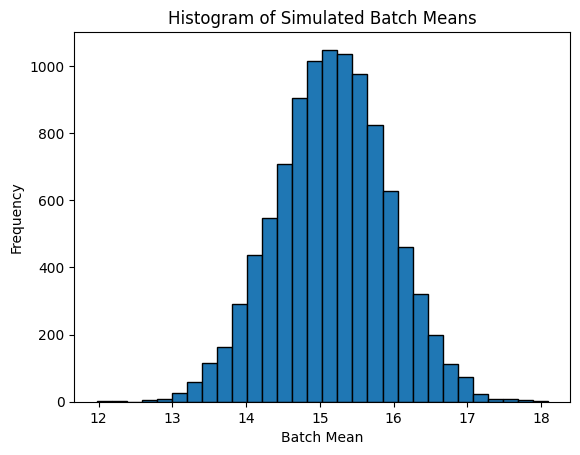

In [10]:
plt.hist(batch_means, bins=30, edgecolor='black')
plt.title('Histogram of Simulated Batch Means')
plt.xlabel('Batch Mean')
plt.ylabel('Frequency')
plt.show()

E. Run this loop for 10,000 iteration, representing 10,000 batches. 

In [11]:
print(f"Simulated {num_batches} batches of size {batch_size}.")

Simulated 10000 batches of size 4.


F. Compare the histogram to the confidence intervals calculated in 1-C.

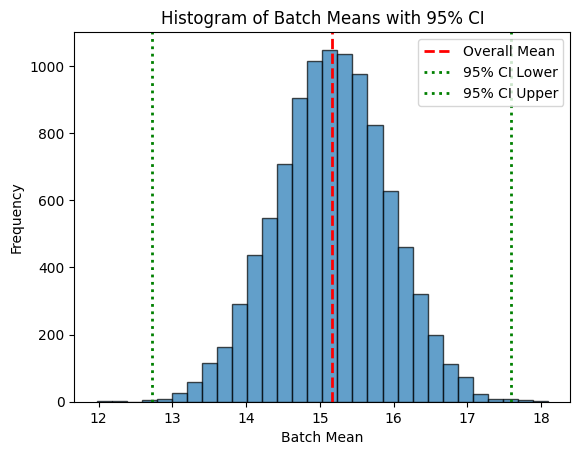

Overall mean: 15.159
Typical 95% CI: [12.727, 17.590]


In [12]:
ci_half_width = t.ppf(0.975, df=3) * sigma / np.sqrt(4)
plt.hist(batch_means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
plt.axvline(mu - ci_half_width, color='green', linestyle='dotted', linewidth=2, label='95% CI Lower')
plt.axvline(mu + ci_half_width, color='green', linestyle='dotted', linewidth=2, label='95% CI Upper')
plt.title('Histogram of Batch Means with 95% CI')
plt.xlabel('Batch Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Overall mean: {mu:.3f}")
print(f"Typical 95% CI: [{mu - ci_half_width:.3f}, {mu + ci_half_width:.3f}]")